In [1]:
import SinglePython
import pandas as pd
import numpy as np
import utils

/app/conda/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
# Uploading an existing reference dataset. 
# As an option, a reference dataset generated by the user can also be used. 
refDataset = pd.read_csv("./Data/Reference/hpca_data.csv", sep=";", decimal = ",", index_col = 0)
refDataset = refDataset.astype('float')
annot = pd.read_csv("./Data/Reference/hpca_annot.csv",sep=";", index_col = 0)
del annot["level1"]
annot.columns = ["level1"]

In [3]:
# An example for a single cell experiment
# The input is the file path which the count data is present. 
# 10X datasets are automatically identified. 
# For the count data that is present in a csv file. Please make sure the file has "expression" keyword in file name in order
# for the program to identify it.
data =utils.readSCData("./Data/Datasets/filtered_feature_bc_matrix/",200)

Variable names are not unique. To make them unique, call `.var_names_make_unique`.


In [4]:
# A singlePython object is created. 
# This object keeps the original single cell data as an AnnData format (scanpy format).
obj = SinglePython.SinglePythonObject(refDataset=refDataset,refAnnot=annot,scData=data,fine_tuning=True,tuning_by="top_n",multiProcess=True)

In [5]:
# The function below starts the annotation procedure.
# The result is added as a observation to the original single cell AnnData object.
obj.annotateCellTypes()

/projects/scTyping/murat/SingleRToPython/tuningMulti.py:43: FutureWarning: by argument to sort_index is deprecated, please use .sort_values(by=...)
  [d.update({i:np.sort(scores.sort_index(by=i,ascending=False).index.values[0:n])}) for i in scores.columns]
/projects/scTyping/murat/SingleRToPython/tuningMulti.py:96: FutureWarning: by argument to sort_index is deprecated, please use .sort_values(by=...)
  [res.update({i:scores.sort_index(by=i,ascending=False).index.values[0:len(top_labels)-1]}) for i in scores.columns]
/projects/scTyping/murat/SingleRToPython/tuningMulti.py:96: FutureWarning: by argument to sort_index is deprecated, please use .sort_values(by=...)
  [res.update({i:scores.sort_index(by=i,ascending=False).index.values[0:len(top_labels)-1]}) for i in scores.columns]
/projects/scTyping/murat/SingleRToPython/tuningMulti.py:96: FutureWarning: by argument to sort_index is deprecated, please use .sort_values(by=...)
  [res.update({i:scores.sort_index(by=i,ascending=False).index.

In [6]:
# The result can be obtained from AnnData object for further examinations.
obj.scData.obs

,n_counts,n_genes,cell_type
AAACCCAAGGAGAGTA-1,8288.0,2620,Monocyte:CD16-
AAACGCTTCAGCCCAG-1,5512.0,1808,B_cell:Naive
AAAGAACAGACGACTG-1,4283.0,1562,T_cell:CD4+_effector_memory
AAAGAACCAATGGCAG-1,2754.0,1225,T_cell:CD8+
AAAGAACGTCTGCAAT-1,6592.0,1831,T_cell:CD4+_central_memory
AAAGGATAGTAGACAT-1,8845.0,2048,B_cell:Memory
AAAGGATCACCGGCTA-1,5344.0,1589,B_cell:Naive
AAAGGATTCAGCTTGA-1,12683.0,3423,Monocyte:CD16-
AAAGGATTCCGTTTCG-1,15917.0,3752,Monocyte:CD16-
AAAGGGCTCATGCCCT-1,7262.0,1759,T_cell:CD4+_Naive


In [ ]:
#### Below here is for further examinations. ####

In [ ]:
# You can observe the gene expression distribution over the samples to determine cells with minimum and maximum number of genes.
import seaborn as sns
from matplotlib import pyplot as plt
def histMatrix(matrix):
    list_of_lists = matrix.values.tolist()
    list_of_fluxes = [item for sublist in list_of_lists for item in sublist]
    sns.set(style="white", palette="muted",color_codes=True)
    plot = sns.distplot(list_of_fluxes)
histMatrix(pd.DataFrame(obj.scData.obs.n_counts))

In [7]:
# The functions for preprocessing of single cell data matrix. You can skip to the next notebook cell.
class CellMetricsFilter:

    def __init__(self, minUMICounts, maxUMICounts, minGenesPerCell, minGeneOccurenceInCell, maxPercentMito = .1, regressOut = []):

        

        self.minUMICounts = minUMICounts
        self.maxUMICounts = maxUMICounts
        self.minGenesPerCell = minGenesPerCell
        self.minGeneOccurenceInCell = minGeneOccurenceInCell
        self.maxPercentMito = maxPercentMito
        self.regressOut = regressOut

    def filter(self, data, sampleName):

        matplotlib.rcParams['figure.figsize'] = [3, 3]

        data.var_names_make_unique()

        print(data)
        mito_genes = [name for name in data.var_names if name.startswith("MT-")]
        data.obs['percent_mito'] = np.ravel(np.sum(data[:, mito_genes].X, axis=1)) / np.ravel(np.sum(data.X, axis=1))
        data.obs['n_counts'] = np.ravel(np.sum(data.X, axis=1))

 

        sc.pp.filter_cells(data, min_genes=0) # Hack to generate the n_genes column
        sc.pp.filter_genes(data, min_cells=0)

 
        priorFilteringCellCount = data.n_obs
        priorFilteringGeneCount = len(data.var[data.var["n_cells"] > 0])

        print("Pre-filtering data characteristics for " + sampleName)
        sc.pl.violin(data, ['n_genes', 'n_counts', 'percent_mito'],

                 jitter=0.4, multi_panel=True)
        

        print("Filtering genes occuring in <" + str(self.minGeneOccurenceInCell) + " cells.")
        sc.pp.filter_genes(data, min_cells=self.minGeneOccurenceInCell)

        print("Filtering cells with <" + str(self.minGenesPerCell) + " genes.")
        sc.pp.filter_cells(data, min_genes=self.minGenesPerCell)

        sc.pl.scatter(data, x='n_counts', y='percent_mito')
        sc.pl.scatter(data, x='n_counts', y='n_genes')

        print("Filtering cells based on >" + str(self.minUMICounts) + " and <" + str(self.maxUMICounts) + " UMI counts.")
        data = data[data.obs['n_counts'] > self.minUMICounts, :]
        data = data[data.obs['n_counts'] < self.maxUMICounts, :]

        print("Filtering cells based on mitochondrial ratio <" + str(self.maxPercentMito) + ".")
        data = data[data.obs['percent_mito'] < self.maxPercentMito, :]

        data.raw =  data.copy()
        data = data[:,[i for i in data.var_names if not "TotalSeq" in i ]]

        postFilteringCellCount = data.n_obs
        postFilteringGeneCount = len(data.var[data.var["n_cells"] > 0])

        sc.pp.normalize_per_cell(data, counts_per_cell_after=1e4)
        sc.pp.log1p(data)
        sc.pp.highly_variable_genes(data, flavor = "seurat", inplace = True)

        filter_result = sc.pp.highly_variable_genes(data, flavor = "seurat", inplace = False)

        sc.pl.highly_variable_genes(filter_result)

        try:

            sc.tl.pca(data)
            sc.pl.pca(data)

        except ValueError:
            print("Could not perform pca.")

        sc.pp.filter_genes(data, min_counts=1) # Remove unwanted zero count genes

        if not self.regressOut: # but if we put nothing it gives error??
            sc.pp.regress_out(data, self.regressOut)

        sc.pp.scale(data, max_value=10)
        

        sc.pl.scatter(data, x='n_counts', y='percent_mito')
        sc.pl.scatter(data, x='n_counts', y='n_genes')

        try:
            sc.tl.pca(data)
            sc.pl.pca(data)

        except ValueError:
            print("Could not perform pca.")

        print("Post-filtering data characteristics for " + sampleName)
        sc.pl.violin(data, ['n_genes', 'n_counts', 'percent_mito'],
            jitter=0.4, multi_panel=True, use_raw = False)

        print(data)
        return data
    
import os
import matplotlib
import scanpy.api as sc
import scipy.io
import numpy as np

def readData(path):    
    matplotlib.rcParams['figure.figsize'] = [3, 3]
    
    data = sc.read(path + 'matrix.mtx', cache=True).transpose()
    data.var_names = np.genfromtxt(path + 'genes.tsv', dtype=str)[:, 1]
    data.obs_names = np.genfromtxt(path + 'barcodes.tsv', dtype=str)
    mito_genes = [name for name in data.var_names if name.startswith("MT-")]
    obj = CellMetricsFilter(500, 25000, 0, 3,mitoGenes=mito_genes,regressOut=True)
    return obj.filter(data,"Sample")

def cluster(data):
    sc.tl.pca(data)
    sc.pp.neighbors(data)
    sc.logging.print_memory_usage()
    sc.tl.umap(data)
    sc.logging.print_memory_usage()

AnnData object with n_obs × n_vars = 1176 × 33538 
    obs: 'n_counts', 'n_genes', 'cell_type'


... storing 'cell_type' as categorical


Pre-filtering data characteristics for Sample


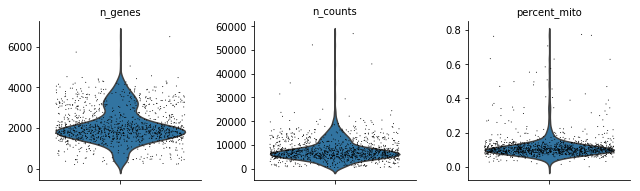

Filtering genes occuring in <3 cells.
Filtering cells with <0 genes.


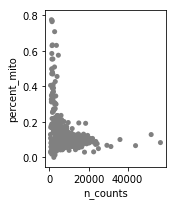

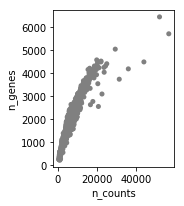

Filtering cells based on >500 and <20000 UMI counts.
Filtering cells based on mitochondrial ratio <0.1.


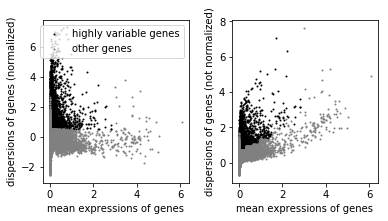

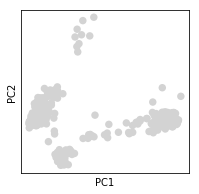

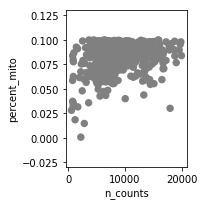

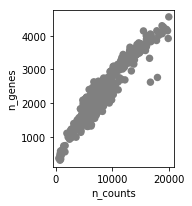

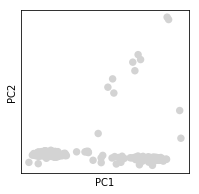

Post-filtering data characteristics for Sample


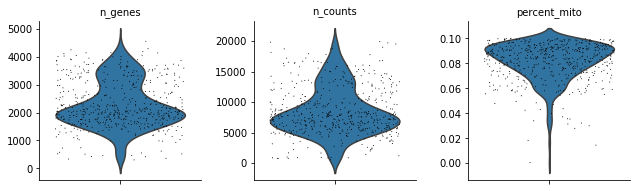

AnnData object with n_obs × n_vars = 540 × 14634 
    obs: 'n_counts', 'n_genes', 'cell_type', 'percent_mito'
    var: 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'n_counts'
    uns: 'pca'
    obsm: 'X_pca'
    varm: 'PCs'
Memory usage: current 3.71 GB, difference +3.71 GB


In [ ]:
# Application of single cell preprocessing.
filter_obj = CellMetricsFilter(500, 20000, 0, 3,regressOut=True)
obj.scData = filter_obj.filter(obj.scData,"Sample")
cluster(obj.scData)

In [ ]:
# Umap of cell classes.
matplotlib.rcParams['figure.figsize'] = [10,10]
sc.pl.umap(obj.scData, color = "cell_type")

    d={}
    [d.update({i:np.sort(scores.sort_index(by=i,ascending=False).index.values[0:n])}) for i in scores.columns]
    while(n>1):
        unique_types=[list(x) for x in set(tuple(x) for x in d.values())]
        for i in unique_types:
            cols=[j for j in d.keys() if list(d.get(j))==i]
            top_labels=i
            res=_FineTuneRoundByN(sc_data,refDataset,annot,top_labels,de,cols)
            [d.update({cols[t]:res[t]}) for t in range(len(cols))]
        n=n-1
    return pd.DataFrame(d,index=["final_annotations"])

    d={}
    [d.update({i:np.sort(scores.sort_index(by=i,ascending=False).index.values[0:n])}) for i in scores.columns]
    while(n>1):
        unique_types=[list(x) for x in set(tuple(x) for x in d.values())]
        d=pd.DataFrame(d)
        d_temp={}
        for i in unique_types:
            cols=d[d.isin(i)].T.dropna(how="any").index.values
            top_labels=i
            res=_FineTuneRoundByN(sc_data,refDataset,annot,top_labels,de,cols)
            [d_temp.update({cols[t]:res[t]}) for t in range(len(cols))]
        n=n-1
        d=d_temp
    return pd.DataFrame(d,index=["final_annotations"])